# Loan Status Prediction

In this project, we will build a model will help us to predict whether a customer will repay the loan or not.
The dataset in this project is obtain from Kaggle
The problem that we need to solve in this project :
    To find whether an Customer will have their loan paid or not.

Therefore, this is a supervised classification  problem to be trained with algorithm likes:
    1. Logisitic Regression
    2. Random Forest Classifier
    3. Decision Tree Classifier

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

There are two datasets that we will be using in our project. The train dataset is the dataset with the help of which we are going 
to build the model and the test dataset with which we will predict whether the customer will have their loan paid or not.

In [105]:
test=pd.read_csv(r'C:\Users\Shloka Daga SD03\dataset\test_loan_pred_input.csv')
train=pd.read_csv(r'C:\Users\Shloka Daga SD03\dataset\train_loan_pred.csv')

In [106]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [107]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [108]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002004,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [109]:
train.shape

(614, 13)

Lets, check whether the train dataset contains missing value and if there are missing values, let us it replace with a certain value.

In [110]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [111]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode().values[0])
train['Married']=train['Married'].fillna(train['Married'].mode().values[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode().values[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode().values[0])
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode().values[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].median())

In [112]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So, as we can see that we have no missing value in our train dataset.

Lets, check whether the test dataset contains missing value and if there are missing values, let us it replace with a certain value.

In [113]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [114]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode().values[0])
test['Married']=test['Married'].fillna(test['Married'].mode().values[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode().values[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode().values[0])
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode().values[0])
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].median())

In [115]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

So, as we can see that we have no missing value in our train dataset.

## Visualizations

[]

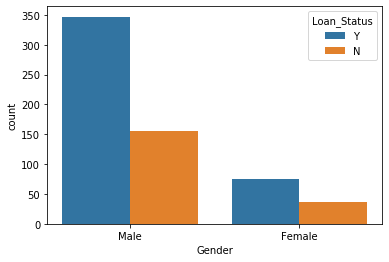

In [116]:
sns.countplot(x='Gender',hue='Loan_Status',data=train)
plt.plot()

The number of loan taken by Male is Greater than the number of loan taken by Female

[]

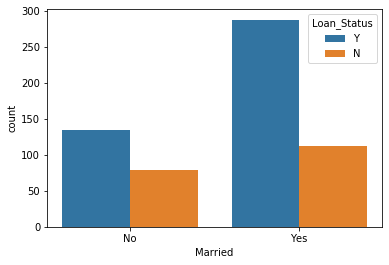

In [117]:
sns.countplot(x='Married',hue='Loan_Status',data=train)
plt.plot()

Married people take more loans than Unmarried people

[]

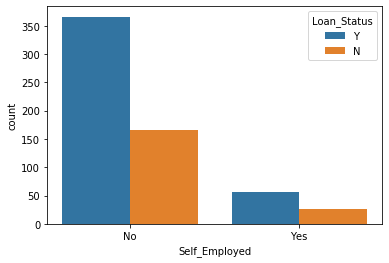

In [118]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=train)
plt.plot()

The category of Self Employed people is less as compared to Salary Earners. 

[]

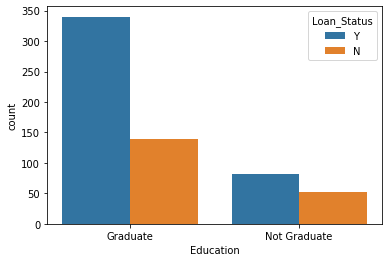

In [119]:
sns.countplot(x='Education',hue='Loan_Status',data=train)
plt.plot()

[]

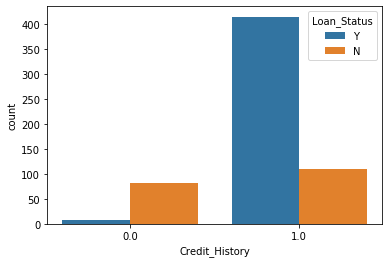

In [120]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=train)
plt.plot()

As per the figure, people having credit history as 1 are more likely to pay their loan back while the people haing credit history as 0 have less chance of paying the loan back.

[]

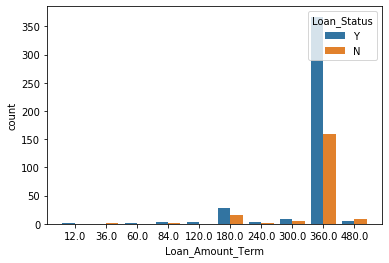

In [121]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=train)
plt.plot()

Most people prefer loan pay back within a year.

[]

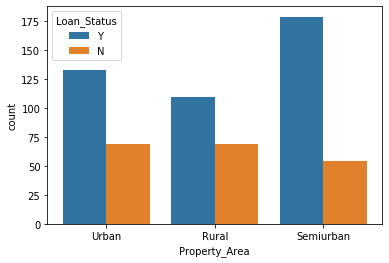

In [122]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=train)
plt.plot()

Now, lets encode the train and test dataset to numeric in order to build the model.

In [123]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [125]:
mapping={'Male':1,'Female':0,
            'Married':'1','Unmarried':0,
            'Graduate':1,'Not Graduate':0,
            'Yes':1,'No':0,
            'Urban':2,'Semiurban':1,'Rural':0,
            '0':0,'1':1,'2':2,'3+':3}
loan_map={'Y':1,'N':0}
train['Loan_Status']=train['Loan_Status'].map(loan_map)
train=train.applymap(lambda s:mapping.get(s) if s in mapping else s)
test=test.applymap(lambda s:mapping.get(s) if s in mapping else s)

In [126]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [127]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,2
364,LP002980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [129]:
train.drop('Loan_ID',axis=1,inplace=True)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


## Heatmap

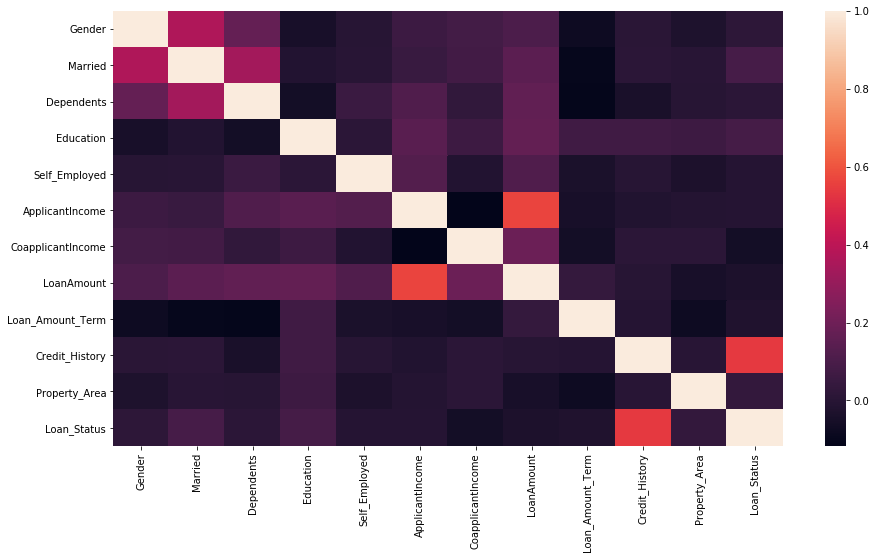

In [130]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr())

In the heatmap, we can see that other correlations are not much high but the correlation between Loan_Status and Credit_History is very good.

## Model Building

First, we will import all the packages that we will require to build the model.

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [132]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

### Logistic Regression

In [133]:
LR= LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
LR_accuracry=accuracy_score(y_pred,y_test)
print('Logistic Regression Accuracy : ',LR_accuracry)

Logistic Regression Accuracy :  0.8275862068965517


C:\Users\Shloka Daga SD03\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Decision Tree Classifier

In [134]:
DTC= DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred=DTC.predict(X_test)
DTC_accuracry=accuracy_score(y_pred,y_test)
print('Decision Tree Classifier Accuracy : ',DTC_accuracry)

Decision Tree Classifier Accuracy :  0.7438423645320197


### Random Forest Classifier

In [135]:
RFC= RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)
RFC_accuracry=accuracy_score(y_pred,y_test)
print('Random Forest Classifier Accuracy : ',RFC_accuracry)

Random Forest Classifier Accuracy :  0.7980295566502463


Now, as we can see that the accuracy of Logistic Regression is better than Decision Tree Classifier and Random Forest Classifier.
So, we will use Logistic Regression to do the final prediction on the test dataset.

## Prediction

Now, with the help of the model that we have build with the help of train dataset, we can now predict whether the customer 
will have their loan paid or not using the test dataset.

In [136]:
Loan_ID=test['Loan_ID']
Loan_Status=LR.predict(test.drop('Loan_ID',axis=1))
output=pd.DataFrame({'Loan_ID':Loan_ID,'Loan_Status':Loan_Status})
output.to_csv('Loan_status_pred_output.csv',index=False)
output

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [137]:
The file Loan_status_pred_output.csv contains the whole result of prediction.

SyntaxError: invalid syntax (<ipython-input-137-c00a34583c4f>, line 1)